In [1]:
import pandas as pd
import datetime as dt

In [2]:
dataset=pd.read_csv("Quality data Preprocessed data.csv")

In [3]:
dataset

,Product,Time,Equipment,Char A,Char B,Char C,Char D,Char E,Char A6,Char A7,Char A8,Char A9,Char A10,Class
0,Product-1,2022-09-05,B1,82,17,12,126,119,B,C,A,H,H,H
1,Product-2,2022-09-05,B1,96,13,13,72,42,B,B,A,B,B,B
2,Product-3,2022-09-05,B1,60,12,13,56,33,B,B,A,B,B,B
3,Product-4,2022-09-05,B1,53,12,11,45,21,B,B,A,B,A,B
4,Product-5,2022-09-05,B1,56,12,17,49,26,B,B,B,B,A,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,Product-5640,2023-04-20,B1,84,3,14,63,61,B,A,B,B,C,C
5640,Product-5641,2023-04-20,B4,52,2,12,42,20,B,A,A,B,A,B
5641,Product-5642,2023-04-20,B4,56,2,9,66,39,B,A,A,B,B,B
5642,Product-5643,2023-04-20,B1,51,3,13,67,43,B,A,A,B,B,B


In [4]:
dataset.columns

Index(['Product', 'Time', 'Equipment', 'Char A', 'Char B', 'Char C', 'Char D',
       'Char E', 'Char A6', 'Char A7', 'Char A8', 'Char A9', 'Char A10',
       'Class'],
      dtype='object')

In [5]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Product    5644 non-null   object
 1   Time       5644 non-null   object
 2   Equipment  5644 non-null   object
 3   Char A     5644 non-null   int64 
 4   Char B     5644 non-null   int64 
 5   Char C     5644 non-null   int64 
 6   Char D     5644 non-null   int64 
 7   Char E     5644 non-null   int64 
 8   Char A6    5644 non-null   object
 9   Char A7    5644 non-null   object
 10  Char A8    5644 non-null   object
 11  Char A9    5644 non-null   object
 12  Char A10   5644 non-null   object
 13  Class      5644 non-null   object
dtypes: int64(5), object(9)
memory usage: 617.4+ KB


In [6]:
dataset['Time']=pd.to_datetime(dataset['Time'])

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Product    5644 non-null   object        
 1   Time       5644 non-null   datetime64[ns]
 2   Equipment  5644 non-null   object        
 3   Char A     5644 non-null   int64         
 4   Char B     5644 non-null   int64         
 5   Char C     5644 non-null   int64         
 6   Char D     5644 non-null   int64         
 7   Char E     5644 non-null   int64         
 8   Char A6    5644 non-null   object        
 9   Char A7    5644 non-null   object        
 10  Char A8    5644 non-null   object        
 11  Char A9    5644 non-null   object        
 12  Char A10   5644 non-null   object        
 13  Class      5644 non-null   object        
dtypes: datetime64[ns](1), int64(5), object(8)
memory usage: 617.4+ KB


In [8]:
startdate="2022-09-05"
enddate="2023-04-20"
df=dataset[dataset['Time'].between(startdate,enddate)][['Time', 'Char A']]

In [9]:
df

,Time,Char A
0,2022-09-05,82
1,2022-09-05,96
2,2022-09-05,60
3,2022-09-05,53
4,2022-09-05,56
...,...,...
5639,2023-04-20,84
5640,2023-04-20,52
5641,2023-04-20,56
5642,2023-04-20,51


In [10]:
column='Char A'

In [11]:
from sklearn.preprocessing import MinMaxScaler
Ms=MinMaxScaler()
data1=Ms.fit_transform(df[[column]])
print("Len:",data1.shape)

Len: (5644, 1)


In [12]:
len(data1)

5644

In [13]:
training_size=round(len(data1)*0.80)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

4515
X_train length: (4515, 1)
X_test length: (1129, 1)
y_train length: (4515, 1)
y_test length: (1129, 1)


In [14]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
from sklearn.metrics import mean_squared_error
trends=['n','t','c','ct']
orders=[(0,0,1),(0,0,2),(0,0,3)]
from statsmodels.tsa.arima.model import ARIMA
for td in trends:
        
        #print(td)
        #trendslist.append(td)
    model = ARIMA(X_train, order=(0,0,10),trend=td,)
    model_fit = model.fit()
        # make prediction
    y_pred= model_fit.predict(len(X_train), len(data1)-1)
        #print(y_pred)
    from sklearn.metrics import r2_score
    mse=mean_squared_error(y_test,y_pred,squared=False)
    from stockFunctions import rmsemape
    print("Trend={}".format(td))
    rmsemape(y_test,y_pred)
    print("************")

Trend=n
RMSE-Testset: 0.30947537969003464
maPe-Testset: 0.9964010028143717
************


C:\Users\Hi\anaconda3\envs\aiads\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trend=t
RMSE-Testset: 0.2558344544540441
maPe-Testset: 1.827426976449415
************
Trend=c
RMSE-Testset: 0.14484910706642795
maPe-Testset: 0.937317030120483
************


C:\Users\Hi\anaconda3\envs\aiads\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trend=ct
RMSE-Testset: 0.144656927642467
maPe-Testset: 0.7785036221462092
************


In [16]:
len(y_test)

1129

In [17]:
#i=1
td="ct"
model = ARIMA(X_train, order=(0,0,30),trend=td)
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(X_train), len(data1)-1)
#print(y_pred)
from sklearn.metrics import r2_score
mse=mean_squared_error(y_test,y_pred,squared=False)
from stockFunctions import rmsemape
print("Trend={}".format(td))
rmsemape(y_test,y_pred)
print("************")

Trend=ct
RMSE-Testset: 0.14457172322171313
maPe-Testset: 0.778136959724649
************


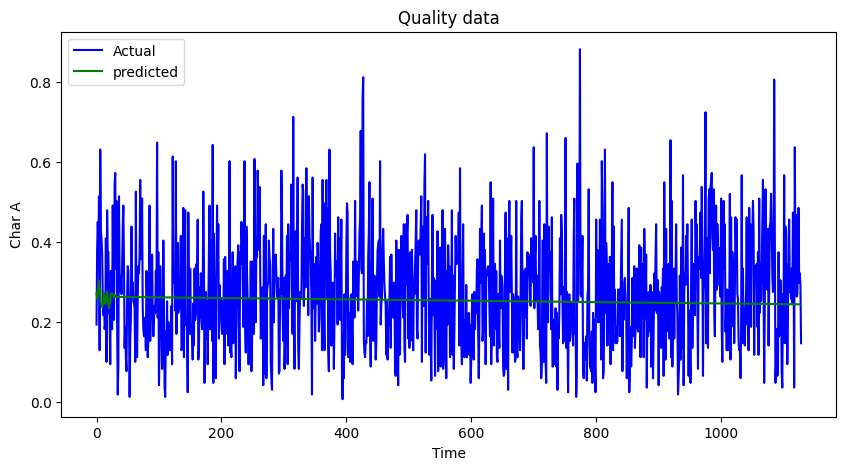

In [18]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","predicted","Quality data","Time","Char A")

In [19]:
len(data1)

5644

In [20]:
y_test

array([[0.19298246],
       [0.38011696],
       [0.4502924 ],
       ...,
       [0.32163743],
       [0.29239766],
       [0.14619883]])

In [21]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])

In [22]:
aTestNormTable

,Char A
0,0.192982
1,0.380117
2,0.450292
3,0.391813
4,0.51462
...,...
1124,0.48538
1125,0.298246
1126,0.321637
1127,0.292398


In [23]:
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)

In [24]:
actual_stock_price_test_ori

array([[34.],
       [66.],
       [78.],
       ...,
       [56.],
       [51.],
       [26.]])

In [25]:
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [26]:
actual_stock_price_test_oriA

,Char A
0,34.0
1,66.0
2,78.0
3,68.0
4,89.0
...,...
1124,84.0
1125,52.0
1126,56.0
1127,51.0


In [27]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [28]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])

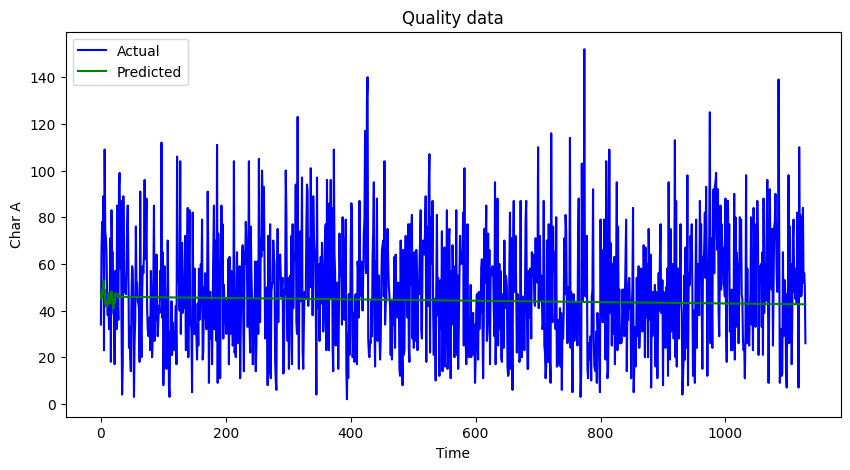

In [29]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","Quality data","Time","Char A")

In [30]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 24.721764670912947
maPe-Testset: 0.6890062311608944


In [31]:
forecast=model_fit.predict(len(data1), len(data1)+10)

In [32]:
forecast

array([0.24367889, 0.24366184, 0.24364479, 0.24362774, 0.24361069,
       0.24359363, 0.24357658, 0.24355953, 0.24354248, 0.24352543,
       0.24350837])

In [33]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["CharAfore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["CharAfore"])

In [34]:
forecast_stock_price_test_oriF

,CharAfore
0,42.669091
1,42.666175
2,42.663259
3,42.660343
4,42.657427
5,42.654511
6,42.651595
7,42.64868
8,42.645764
9,42.642848
